In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("penguins_lter.csv")
# Amend for pandas type inferring and cast object type columns to string
to_string = list(df.select_dtypes(include="object").columns)
df[to_string] = df[to_string].astype("string")

### 2.1 PROZKOUMEJTE JEDNOTLIVÉ ATRIBUTY DATOVÉ SADY, JEJICH TYP A HODNOTY, KTERÝCH NABÝVAJÍ

In [3]:
df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,<NA>
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,<NA>


In [4]:
print("Concise summary about the data: \n")
print(df.info())

print("\nDescriptive statistics:\n", df.describe())

Concise summary about the data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    string 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    string 
 3   Region               344 non-null    string 
 4   Island               344 non-null    string 
 5   Stage                344 non-null    string 
 6   Individual ID        344 non-null    string 
 7   Clutch Completion    344 non-null    string 
 8   Date Egg             344 non-null    string 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    string 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 

### 2.2 PROZKOUMEJTE ROZLOŽENÍ HODNOT JEDNOTLIVÝCH ATRIBUTŮ POMOCÍ VHODNÝCH GRAFŮ, ZAMĚŘTE SE I NA TO,
### JAK HODNOTA JEDNOHO ČI DVOU ATRIBUTŮ OVLIVNÍ ROZLOŽENÍ HODNOT JINÉHO ATRIBUTU

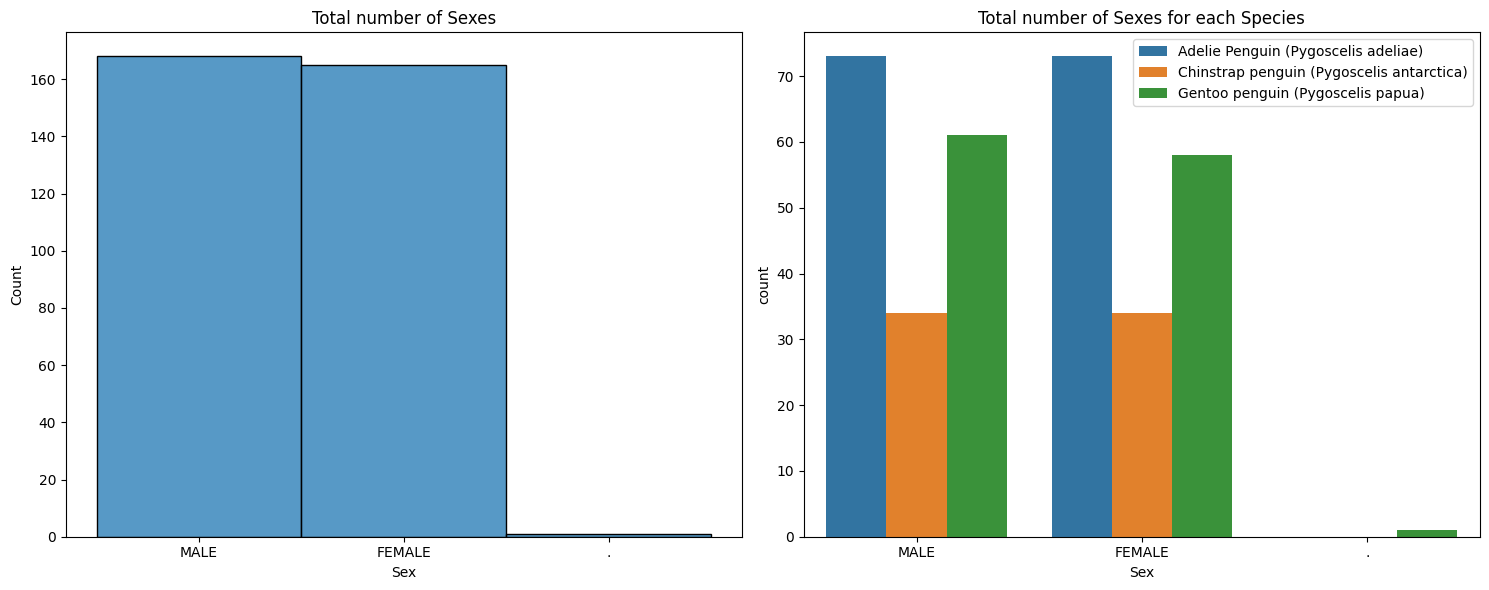

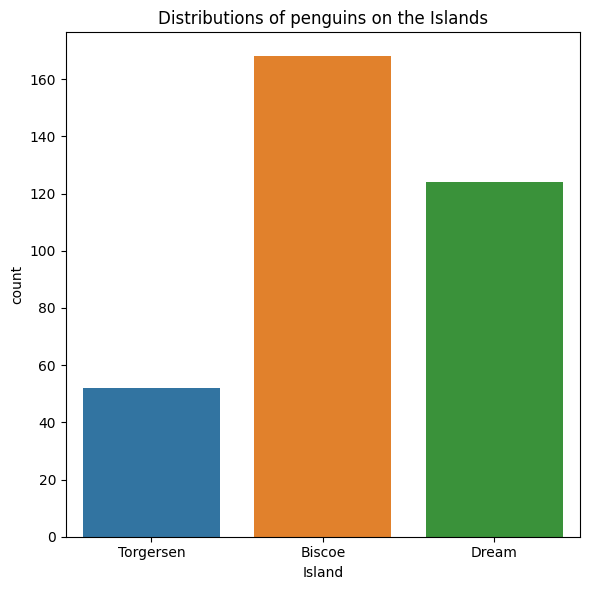

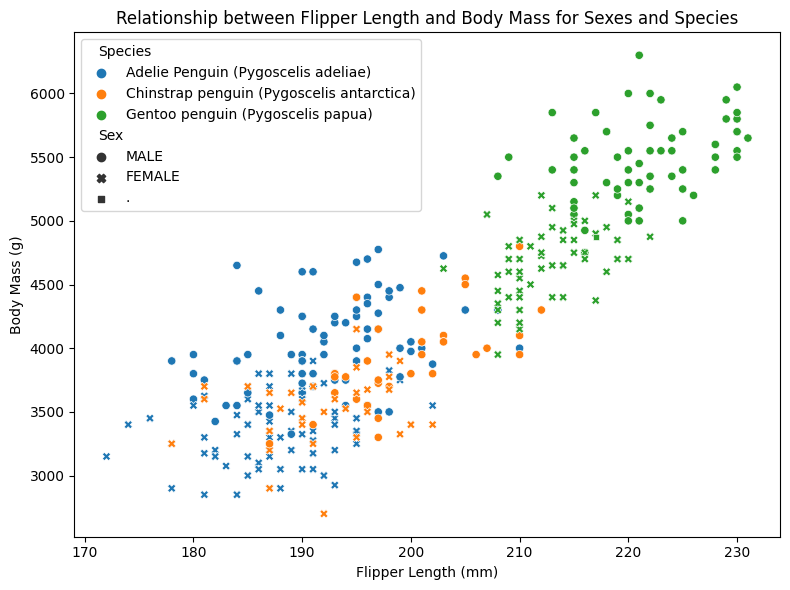

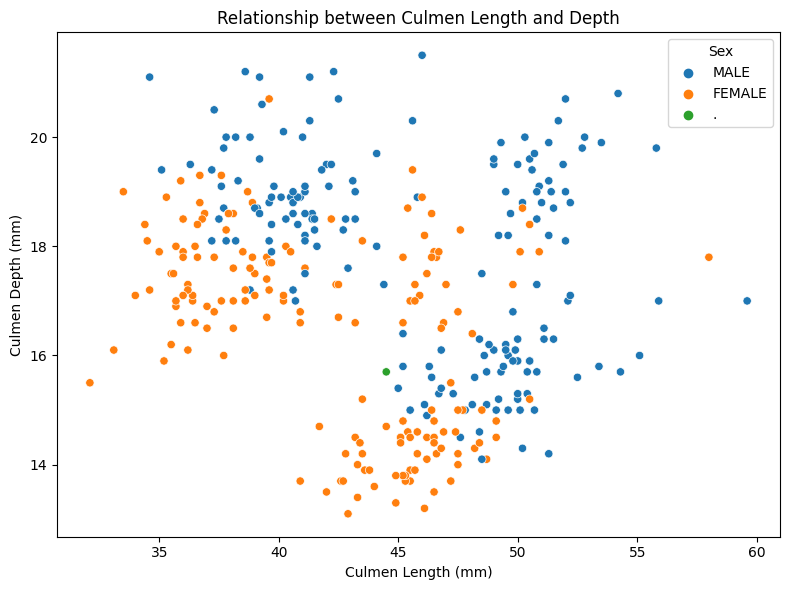

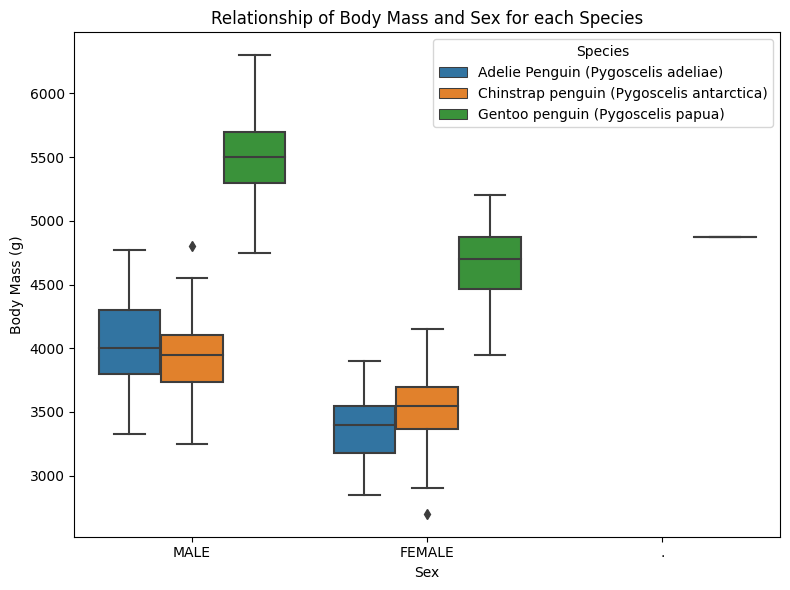

In [5]:
# Total number of Sexes and number of Sexes for each Species
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax1, ax2 = axes
sns.histplot(data=df, x="Sex", ax=ax1)
ax1.set_title("Total number of Sexes")
sns.countplot(hue="Species", data=df, x="Sex", ax=ax2)
ax2.set_title("Total number of Sexes for each Species")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Distributions of penguins on the Islands
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.countplot(x="Island", data=df, ax=ax)
ax.set_title("Distributions of penguins on the Islands")
plt.tight_layout()
plt.show()

# Relationship between Flipper Length and Body Mass for Sexes and Species
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(
    x="Flipper Length (mm)", y="Body Mass (g)", data=df, style="Sex", hue="Species", ax=ax
)
ax.set_title("Relationship between Flipper Length and Body Mass for Sexes and Species")
plt.tight_layout()
plt.show()

# Relationship between Culmen Length and Depth
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", data=df, hue="Sex", ax=ax)
ax.set_title("Relationship between Culmen Length and Depth")
plt.tight_layout()
plt.show()

# Relationship of Body Mass and Sex for each Species
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(
    x="Sex",
    y="Body Mass (g)",
    hue="Species",
    data=df,
    ax=ax,
)
ax.set_title("Relationship of Body Mass and Sex for each Species")
plt.tight_layout()
plt.show()

### 2.3 ZJISTĚTE, ZDA ZVOLENÁ DATOVÁ SADA OBSAHUJE NĚJAKÉ ODLEHLÉ HODNOTY.

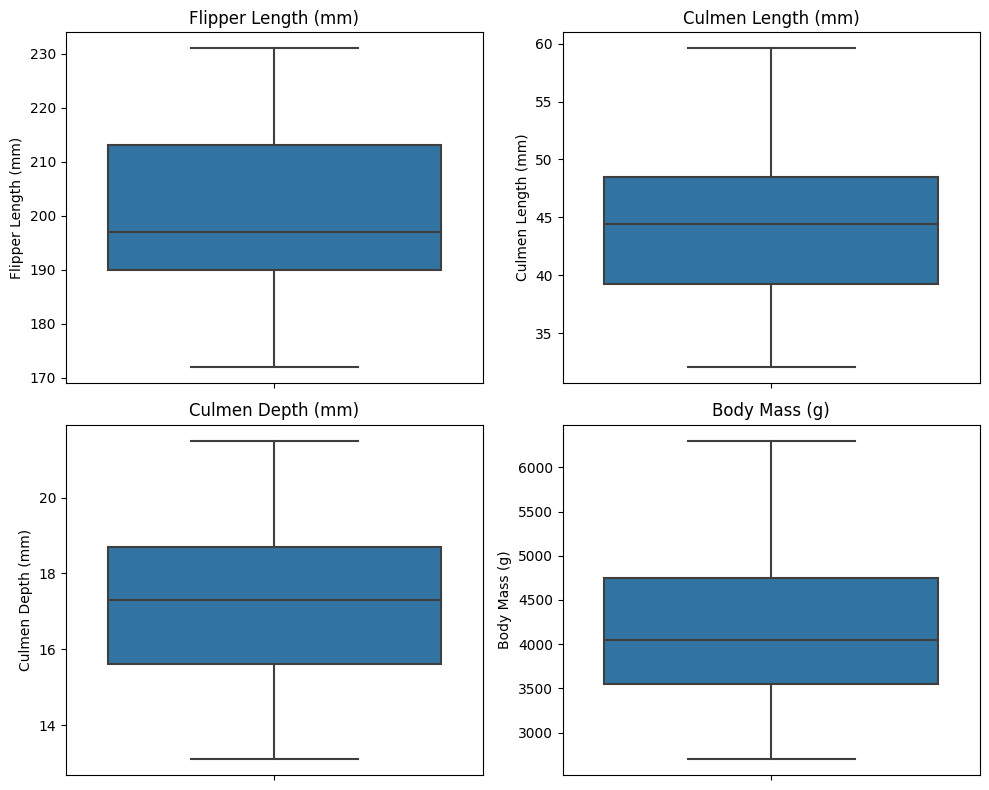

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Before filling null values, we need to check numerical attributes for outliers using boxplot
sns.boxplot(ax=axes[0, 0], y="Flipper Length (mm)", data=df)
axes[0, 0].set_title("Flipper Length (mm)")
sns.boxplot(ax=axes[0, 1], y="Culmen Length (mm)", data=df)
axes[0, 1].set_title("Culmen Length (mm)")
sns.boxplot(ax=axes[1, 0], y="Culmen Depth (mm)", data=df)
axes[1, 0].set_title("Culmen Depth (mm)")
sns.boxplot(ax=axes[1, 1], y="Body Mass (g)", data=df)
axes[1, 1].set_title("Body Mass (g)")
plt.tight_layout()
plt.show()

### 2.4 PROVEĎTE PODROBNOU ANALÝZU CHYBĚJÍCÍ HODNOT (CELKOVÝ POČET CHYBĚJÍCÍCH HODNOT, POČET OBJEKTŮ S VÍCE CHYBĚJÍCÍMI HODNOTAMI ATD.)

In [7]:
print("\nNumber of null values:\n", df.isnull().sum())

# Check the unique values for each attribute and selec the attributes with only 1 unique value, these will be dropped
# as they won't be useful for the classification either way
only_one_unique = df.nunique()[df.nunique() == 1].index
print("\nNumber of unique entries for each attribute:\n", df.nunique())
print("\nAttributes with only one unique value: ", only_one_unique.tolist())


Number of null values:
 studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Number of unique entries for each attribute:
 studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                

### 3.1 ODSTRAŇTE Z DATOVÉ SADY ATRIBUTY, KTERÉ JSOU PRO DANOU DOLOVACÍ ÚLOHU IRELEVANTNÍ. 
#### task 3.1 and 2.5 are switched for easier correlation analysis

In [8]:
# We can fix the missing value in Delta 15 N and Delta 13 C however seeing as we already know they won't be neccessary for the classification
# dataset, we will just drop them off completely. Other atributes won't be needed for classification at all
# Comments have too many missing values to be worthwhile fixing them  all by hand or automatically + they won't be needed for the classification

drop_atrs = only_one_unique.tolist() + [
    "Delta 15 N (o/oo)",
    "Delta 13 C (o/oo)",
    "Comments",
    "Sample Number",
    "studyName",
    "Individual ID",
    "Date Egg",
    "Clutch Completion",
]
df.drop(drop_atrs, axis=1, inplace=True)

### 2.5 PROVEĎTE KORELAČNÍ ANALÝZU NUMERICKÝCH ATRIBUTŮ

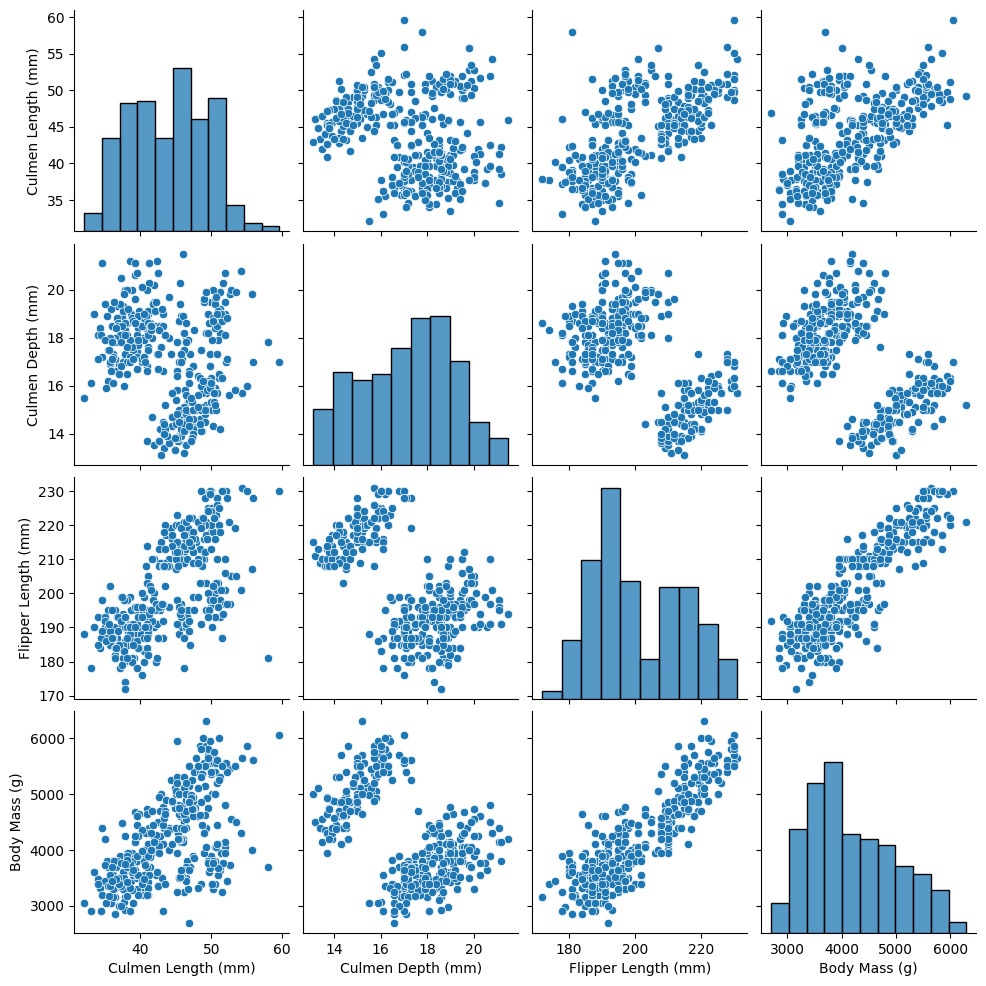

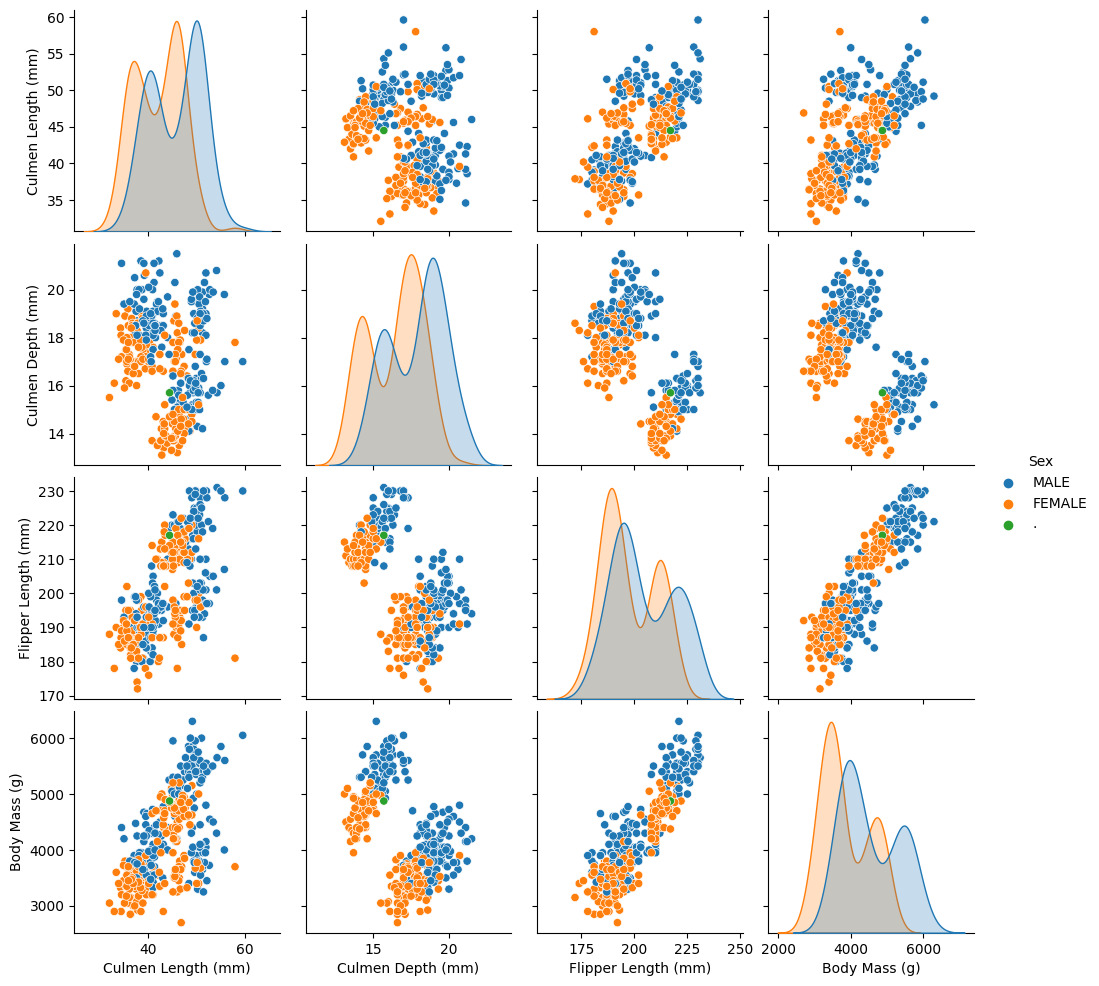

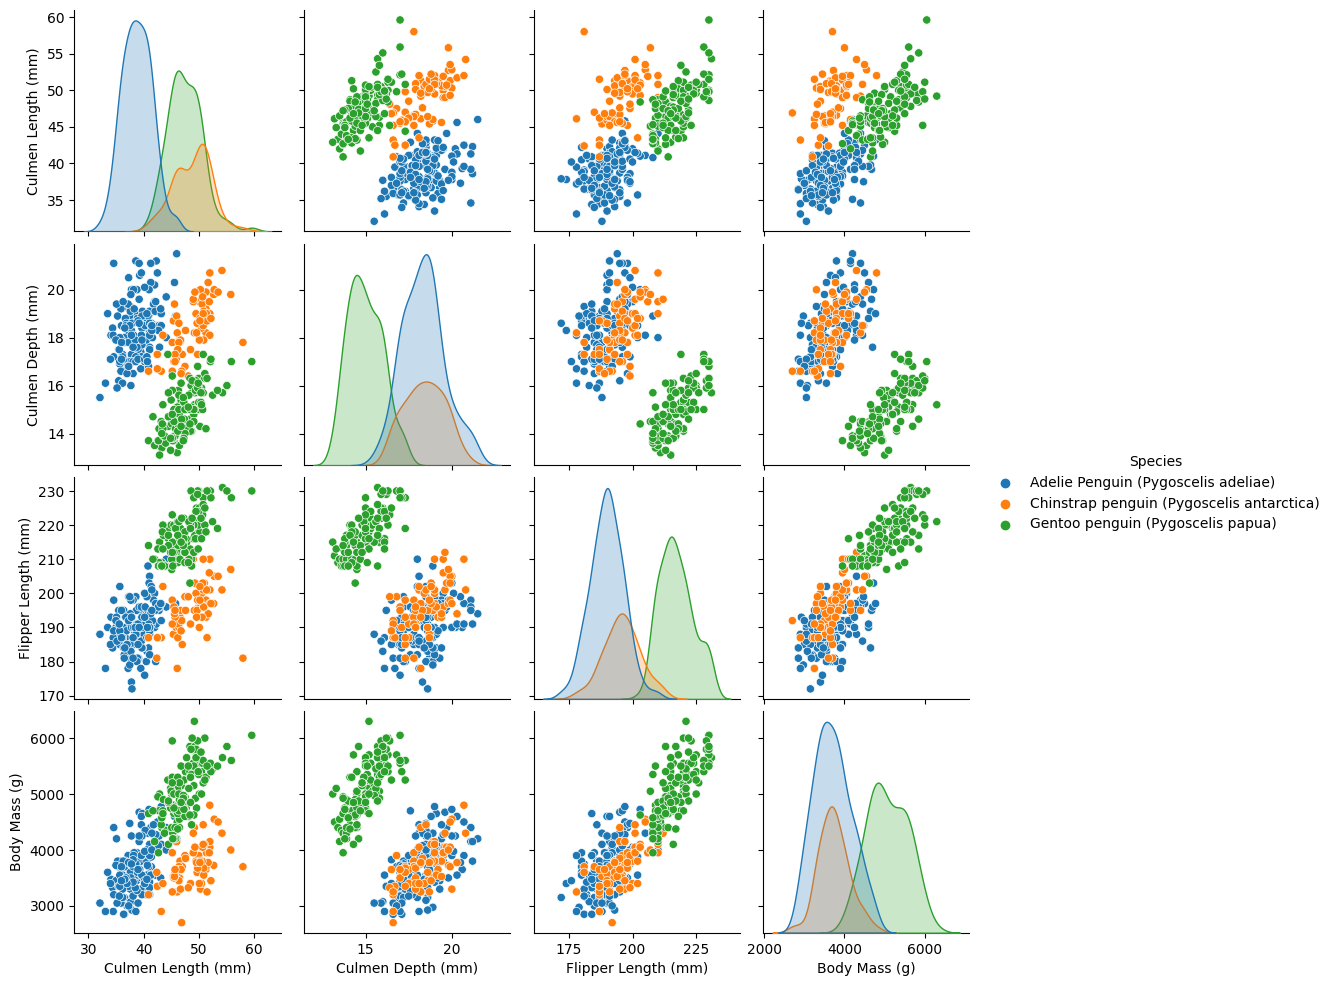

/tmp/ipykernel_991/905792617.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


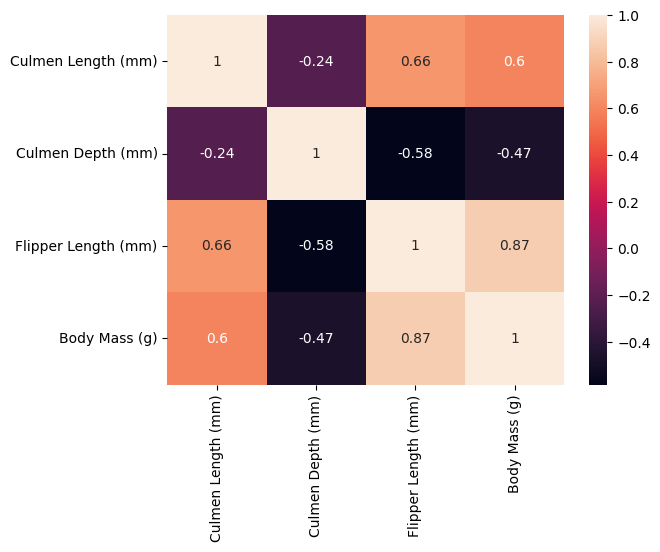

In [9]:
# Pairplot (matica bodovycch grafov) for numerical attributes
sns.pairplot(df)

# Pairplot (matica bodovycch grafov) for categorical attributes
sns.pairplot(df, hue="Sex")
sns.pairplot(df, hue="Species")

plt.show()

# Heatmap (korelacna matica)
sns.heatmap(df.corr(), annot=True)
plt.show()

### 3.2 VYPOŘÁDEJTE SE S CHYBĚJÍCÍMI HODNOTAMI. PRO ODSTRANĚNÍ TĚCHTO HODNOT VYUŽIJTE ALESPOŇ DVĚ RŮZNÉ
### METODY PRO ODSTRANĚNÍ CHYBĚJÍCÍCH HODNOT.

In [10]:
# No. of unique value for Sex is 3 which is quite unusual for sex, upon displaying the unique values we see that it has corrupt data
# as . is not a Sex category, we shall replace . with FEMALE based on graph of Relationship of Body Mass and Sex for each Species
print(df["Sex"].unique())
print(df.loc[df["Sex"] == "."].index.item())

df["Sex"] = df["Sex"].replace(".", "FEMALE")

# print("\nCorrected corrupt entry:\n", df.loc[336])

# The first method we used to correct the missing values is to fill them up with mean for numerical attributes and
# mode for categorical attributes, the second method was already done when we dropped some attributes such as Comments which had
# 316 missing values and it would be pointless to try and fill them up

# print("Before correction", df.loc[3])
for col in df.columns:
    if df[col].isnull().any() == True:
        if df[col].dtype == "float64":
            df[col] = df[col].fillna(df[col].mean())
        if df[col].dtype == "string":
            df[col] = df[col].fillna(df[col].mode()[0])

# print("After correction", df.loc[3])

<StringArray>
['MALE', 'FEMALE', <NA>, '.']
Length: 4, dtype: string
336


### 3.3 VYPOŘÁDEJTE SE S ODLEHLÝMI HODNOTAMI, JSOU-LI V DATOVÉ SADĚ PŘÍTOMNY.
### There are no outliers in the dataset so there is nothing to be done here

### 3.4 PRO JEDNU VARIANTU DATOVÉ SADY PROVEĎTE DISKRETIZACI NUMERICKÝCH ATRIBUTŮ TAK, ABY VÝSLEDNÁ DATOVÁ SADA BYLA
### VHODNÁ PRO ALGORITMY, KTERÉ VYŽADUJÍ NA VSTUPU KATEGORICKÉ ATRIBUTY.

In [11]:
categorical_df = df.copy()
bins = pd.IntervalIndex.from_tuples([(32, 36), (36, 40), (40, 44), (44, 48), (48, 52), (52, 56), (56, 60)])
categorical_df["Culmen Length (mm)"] = pd.cut(categorical_df["Culmen Length (mm)"], bins)

bins = pd.IntervalIndex.from_tuples([(13, 14.5), (14.5, 16), (16, 17.5), (17.5, 19), (19, 20.5), (20.5, 22)])
categorical_df["Culmen Depth (mm)"] = pd.cut(categorical_df["Culmen Depth (mm)"], bins)

bins = pd.IntervalIndex.from_tuples([(171, 181), (181, 191), (191, 201), (201, 211), (211, 221), (221, 231)])
categorical_df["Flipper Length (mm)"] = pd.cut(categorical_df["Flipper Length (mm)"], bins)

# for body mass are good bin values by default
categorical_df["Body Mass (g)"] = pd.cut(categorical_df["Body Mass (g)"], 8)
categorical_df.describe()


,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
count,344,344,344,344,344,344,344
unique,3,3,7,6,6,8,2
top,Adelie Penguin (Pygoscelis adeliae),Biscoe,"(44, 48]","(17.5, 19.0]","(181, 191]","(3600.0, 4050.0]",MALE
freq,152,168,80,104,92,79,178


In [12]:
categorical_df.head(50).to_csv("penguins_categorical.csv")

### 3.5 PRO DRUHOU VARIANTU DATOVÉ SADY PROVEĎTE VHODNOU TRANSFORMACI KATEGORICKÝCH ATRIBUTŮ NA NUMERICKÉ ATRIBUTY. 
### DÁLE PAK PROVEĎTE NORMALIZACI NUMERICKÝCH ATRIBUTŮ, KTERÉ MÁ SMYSL NORMALIZOVAT.
### VÝSLEDNÁ DATOVÁ SADA BY MĚLA BÝT VHODNÁ PRO METODY VYŽADUJÍCÍ NUMERICKÉ VSTUPY. 

In [13]:
numerical_df = df.copy()
numerical_df["Species"] = pd.factorize(numerical_df["Species"])[0] + 1
numerical_df["Island"] = pd.factorize(numerical_df["Island"])[0] + 1
numerical_df["Sex"] = pd.factorize(numerical_df["Sex"])[0] + 1

Normalize values. Because there is no outliers in dataset, we can use min-max normalization.

In [14]:
to_normalize = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
df_to_normalize = numerical_df[to_normalize]
df_to_normalize = (df_to_normalize-df_to_normalize.min())/(df_to_normalize.max()-df_to_normalize.min())
numerical_df[to_normalize] = df_to_normalize
numerical_df.rename(columns={"Culmen Length (mm)": "Culmen Length",
                             "Culmen Depth (mm)": "Culmen Depth", 
                             "Flipper Length (mm)": "Flipper Length", 
                             "Body Mass (g)": "Body Mass",
                             },                    
                    inplace=True,
                    )
numerical_df.describe()

,Species,Island,Culmen Length,Culmen Depth,Flipper Length,Body Mass,Sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,1.918605,2.209302,0.429888,0.482282,0.490088,0.417154,1.482558
std,0.893320,0.684970,0.197951,0.234408,0.237638,0.222115,0.500424
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,0.260909,0.297619,0.305085,0.236111,1.000000
50%,2.000000,2.000000,0.441818,0.500000,0.423729,0.375000,1.000000
75%,3.000000,3.000000,0.596364,0.666667,0.694915,0.569444,2.000000
max,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [15]:
numerical_df.head(50).to_csv("penguins_numerical.csv")